Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stopping at epoch 47


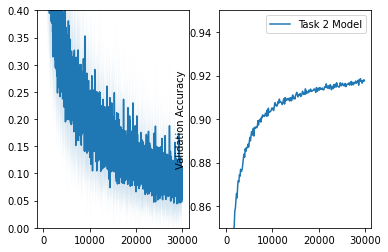

In [3]:
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images, one_hot_encode, SoftmaxModel
from task2 import SoftmaxTrainer


if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 50
    learning_rate = .1
    batch_size = 32
    neurons_per_layer = [64, 10]
    momentum_gamma = .9  # Task 3 hyperparameter
    shuffle_data = True

    use_improved_sigmoid = False
    use_improved_weight_init = False
    use_momentum = False

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)

    model = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    plt.subplot(1, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    plt.ylim([0, .4])
    plt.subplot(1, 2, 2)
    plt.ylim([0.85, .95])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()

In [7]:
%run "create_submission_zip.py"

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Files added to zip:
	task2.py
	task2a.py
	task3.py
	task4c.py
	trainer.py
	utils.py
	mnist.py
Zipfile saved to: assignment_code.zip
Please, upload your assignment PDF file outside the zipfile to blackboard.
